In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [207]:
df = pd.read_csv('heart.csv')

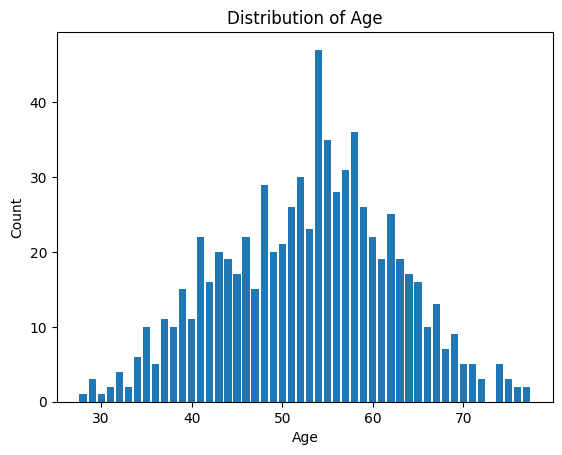

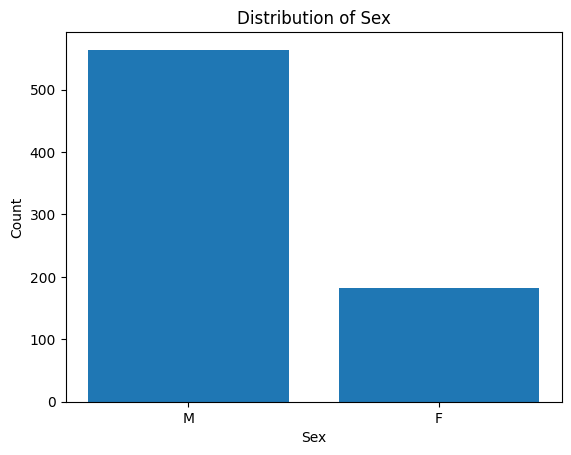

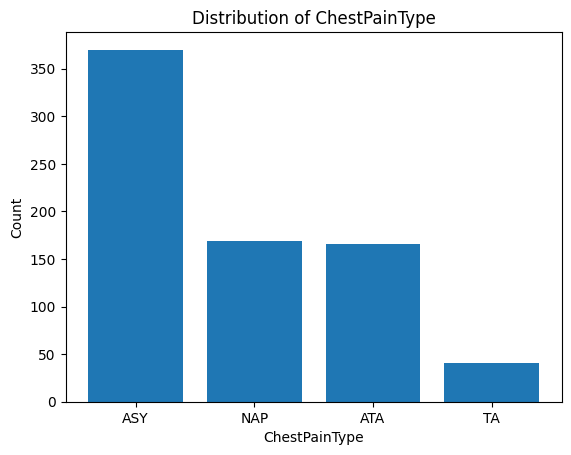

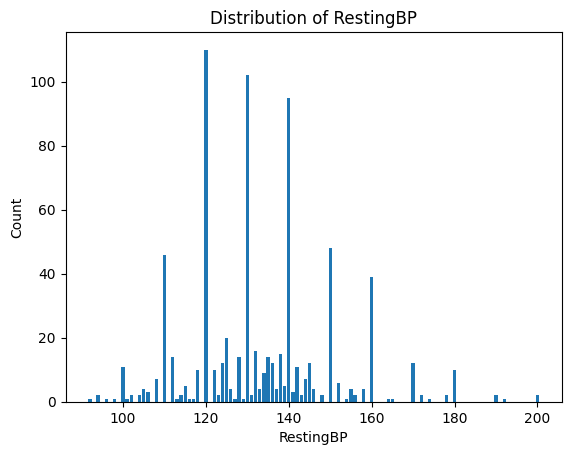

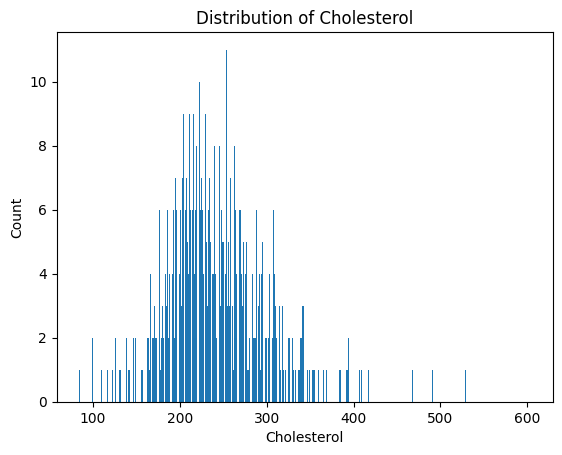

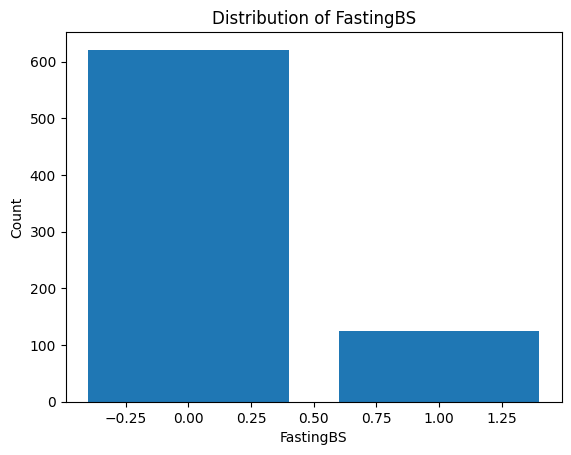

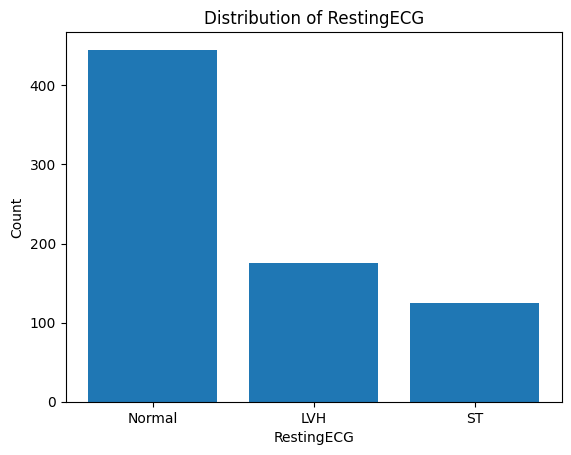

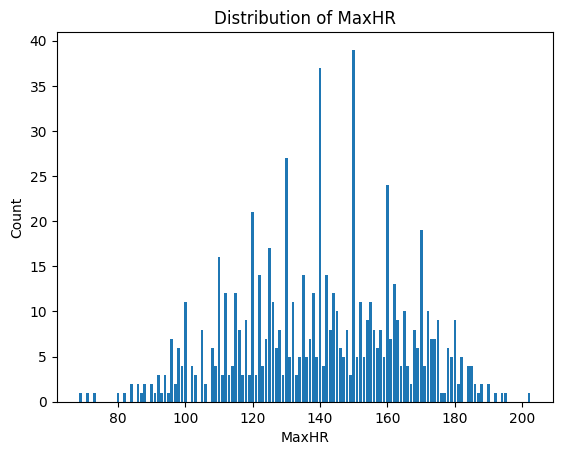

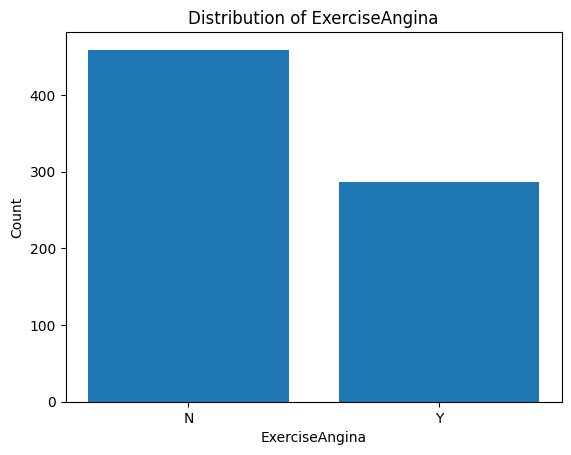

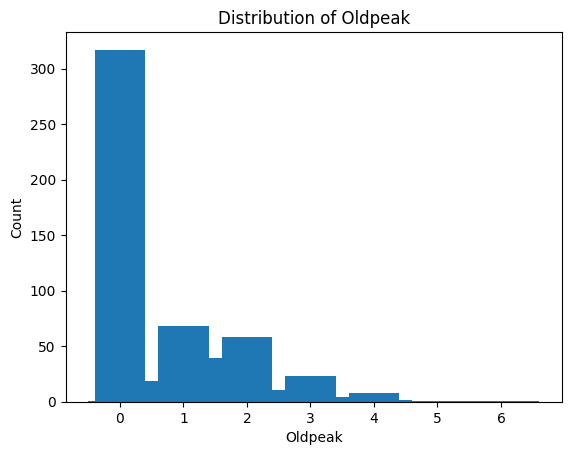

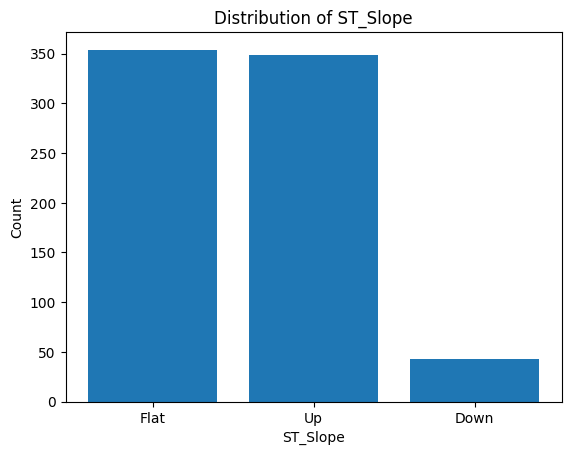

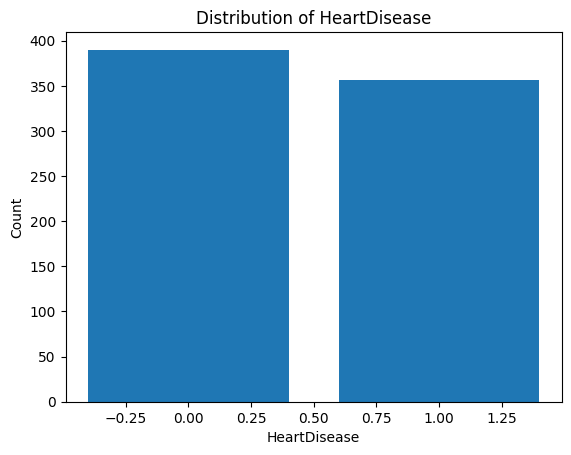

In [208]:
attributes = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
              'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

# Iterate over each attribute and plot its distribution
for attribute in attributes:
    # Count the occurrences of each category
    attribute_counts = df[attribute].value_counts()

    # Plotting a bar plot of the attribute distribution
    plt.bar(attribute_counts.index, attribute_counts.values)
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.title(f'Distribution of {attribute}')
    plt.show()

In [209]:
df.shape

(746, 12)

In [210]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0
1,52,M,ATA,140,100,0,Normal,138,Y,0.0,Up,0
2,56,M,ASY,120,100,0,Normal,120,Y,1.5,Flat,1
3,69,M,ASY,140,110,1,Normal,109,Y,1.5,Flat,1
4,76,M,NAP,104,113,0,LVH,120,N,3.5,Down,1


In [211]:
df.nunique()

Age                49
Sex                 2
ChestPainType       4
RestingBP          63
Cholesterol       221
FastingBS           2
RestingECG          3
MaxHR             109
ExerciseAngina      2
Oldpeak            43
ST_Slope            3
HeartDisease        2
dtype: int64

In [212]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [213]:
df.duplicated().sum()

0

## Label Encoder 

In [214]:
from sklearn.preprocessing import LabelEncoder

In [215]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [216]:
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])

In [217]:
df['RestingECG'] = le.fit_transform(df['RestingECG'])

In [218]:
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])

In [219]:
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [220]:
# Define the features to consider
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
            'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

# Initialize arrays to store min and max values
min_values = []
max_values = []

# Iterate over each feature
for feature in features:
    min_value = df[feature].min()
    max_value = df[feature].max()
    min_values.append(min_value)
    max_values.append(max_value)

# Convert lists to arrays
min_values = np.array(min_values)
max_values = np.array(max_values)

# Print the results
for i in range(len(features)):
    print("Feature:", features[i])
    print("Minimum Value:", min_values[i])
    print("Maximum Value:", max_values[i])
    print()


Feature: Age
Minimum Value: 28.0
Maximum Value: 77.0

Feature: Sex
Minimum Value: 0.0
Maximum Value: 1.0

Feature: ChestPainType
Minimum Value: 0.0
Maximum Value: 3.0

Feature: RestingBP
Minimum Value: 92.0
Maximum Value: 200.0

Feature: Cholesterol
Minimum Value: 85.0
Maximum Value: 603.0

Feature: FastingBS
Minimum Value: 0.0
Maximum Value: 1.0

Feature: RestingECG
Minimum Value: 0.0
Maximum Value: 2.0

Feature: MaxHR
Minimum Value: 69.0
Maximum Value: 202.0

Feature: ExerciseAngina
Minimum Value: 0.0
Maximum Value: 1.0

Feature: Oldpeak
Minimum Value: -0.1
Maximum Value: 6.2

Feature: ST_Slope
Minimum Value: 0.0
Maximum Value: 2.0

Feature: HeartDisease
Minimum Value: 0.0
Maximum Value: 1.0



In [221]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,56,1,0,120,85,0,1,140,0,0.0,2,0
1,52,1,1,140,100,0,1,138,1,0.0,2,0
2,56,1,0,120,100,0,1,120,1,1.5,1,1
3,69,1,0,140,110,1,1,109,1,1.5,1,1
4,76,1,2,104,113,0,0,120,0,3.5,0,1


In [222]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,0.756032,0.840483,133.022788,244.635389,0.167560,0.931635,140.226542,0.384718,0.901609,1.410188,0.477212
std,9.505888,0.429762,0.958198,17.282750,59.153524,0.373726,0.631939,24.524107,0.486855,1.072861,0.598076,0.499816
min,28.000000,0.000000,0.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,1.000000,0.000000,120.000000,207.250000,0.000000,1.000000,122.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,237.000000,0.000000,1.000000,140.000000,0.000000,0.500000,1.000000,0.000000
75%,59.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [223]:
# Define the features of interest
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
            'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

# Print the unique values for each feature
for feature in features:
    unique_values = df[feature].unique()
    print("Feature:", feature)
    print("Unique Values:", unique_values)
    print()

Feature: Age
Unique Values: [56 52 69 76 38 72 59 57 50 28 66 62 44 49 39 42 71 51 34 41 48 35 36 55
 45 46 58 63 54 61 40 77 37 70 43 53 65 60 68 47 64 32 75 29 67 74 31 30
 33]

Feature: Sex
Unique Values: [1 0]

Feature: ChestPainType
Unique Values: [0 1 2 3]

Feature: RestingBP
Unique Values: [120 140 104  92 160 130 150 135 108 131 112 118 152 100 124 123 136 126
 138 110 139 158 156 145 155 164 170 142 132 125 133 116 122 144 129 101
 200 105  94 172 134 148 128 137 115 143 180 146  98 106 178 117 154 190
 141 174 114 102 192 165  96 127 113]

Feature: Cholesterol
Unique Values: [ 85 100 110 113 117 123 126 129 131 132 139 141 142 147 149 152 153 156
 157 159 160 161 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 190 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 24

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
X = df.drop('HeartDisease', axis=1)

In [226]:
y = df['HeartDisease']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Normal

In [228]:
from sklearn.metrics import accuracy_score


In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))  # 4
models.append(('SVM', SVC(kernel='linear'))) # 3
models.append(('AB', AdaBoostClassifier())) # 2
models.append(('GBM', GradientBoostingClassifier())) # 1

# evaluate each model in turn
results = {}
for name, model in models:
    model.fit(X_train, y_train)
    accuracy0 = model.score(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print("train %s: %.3f%%" % (name, accuracy0 * 100))
    print("test %s: %.3f%%" % (name, acc * 100))


E:\Aconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train LR: 86.590%
test LR: 83.482%
train SVM: 87.165%
test SVM: 83.036%
train AB: 92.146%
test AB: 82.589%
train GBM: 97.510%
test GBM: 83.036%


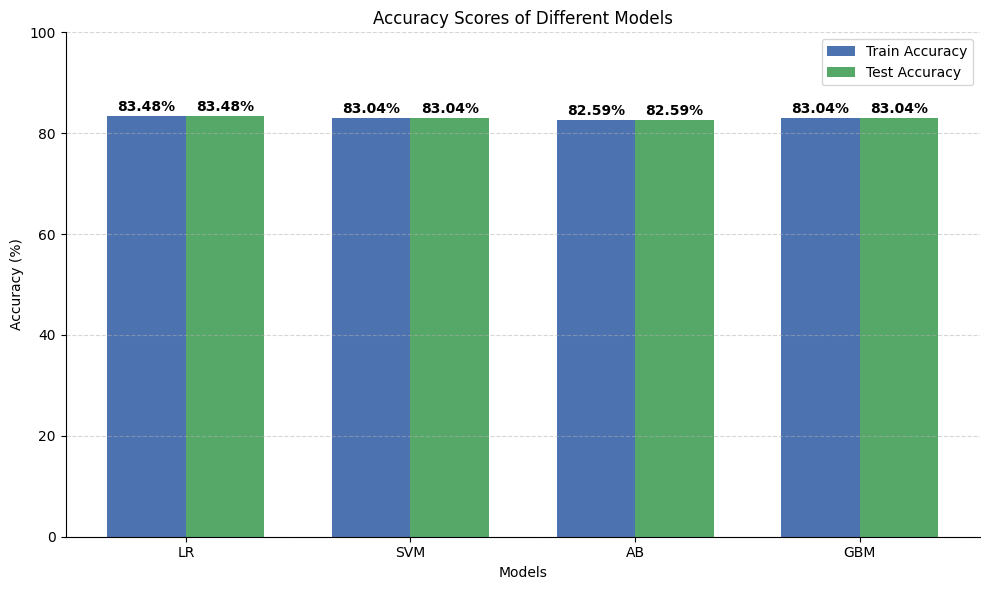

In [230]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for plotting
models = ['LR', 'SVM', 'AB', 'GBM']
train_scores = [accuracy0 * 100 for accuracy0 in results.values()]
test_scores = [acc * 100 for acc in results.values()]

# Set color palette
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2']

# Create the bar plot
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Train Accuracy', color=colors[0])
plt.bar(x + width/2, test_scores, width, label='Test Accuracy', color=colors[1])

# Add data labels
for i, v in enumerate(train_scores):
    plt.text(i - width/2, v + 1, f'{v:.2f}%', ha='center', color='black', fontweight='bold')
for i, v in enumerate(test_scores):
    plt.text(i + width/2, v + 1, f'{v:.2f}%', ha='center', color='black', fontweight='bold')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Scores of Different Models')
plt.xticks(x, models)
plt.ylim(0, 100)
plt.legend()

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


## Normalization


In [231]:
# min max scaler
from sklearn.preprocessing import MinMaxScaler

In [232]:

# normalize data between 0 and 1
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(df)

In [233]:
data_normalized

array([[0.57142857, 1.        , 0.        , ..., 0.01587302, 1.        ,
        0.        ],
       [0.48979592, 1.        , 0.33333333, ..., 0.01587302, 1.        ,
        0.        ],
       [0.57142857, 1.        , 0.        , ..., 0.25396825, 0.5       ,
        1.        ],
       ...,
       [0.08163265, 1.        , 0.        , ..., 0.01587302, 0.5       ,
        1.        ],
       [0.79591837, 0.        , 0.66666667, ..., 0.26984127, 0.5       ,
        0.        ],
       [0.53061224, 1.        , 0.        , ..., 0.17460317, 0.5       ,
        1.        ]])

In [234]:
df_normalized = pd.DataFrame(data_normalized, columns=df.columns)

In [235]:
df_normalized.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.571429,1.0,0.000000,0.259259,0.000000,0.0,0.5,0.533835,0.0,0.015873,1.0,0.0
1,0.489796,1.0,0.333333,0.444444,0.028958,0.0,0.5,0.518797,1.0,0.015873,1.0,0.0
2,0.571429,1.0,0.000000,0.259259,0.028958,0.0,0.5,0.383459,1.0,0.253968,0.5,1.0
3,0.836735,1.0,0.000000,0.444444,0.048263,1.0,0.5,0.300752,1.0,0.253968,0.5,1.0
4,0.979592,1.0,0.666667,0.111111,0.054054,0.0,0.0,0.383459,0.0,0.571429,0.0,1.0


In [236]:
X_train, X_test, y_train, y_test = train_test_split(df_normalized.drop('HeartDisease', axis=1), df_normalized['HeartDisease'], test_size=0.3, random_state=42)

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))  # 4
models.append(('SVM', SVC(kernel='linear'))) # 3
models.append(('AB', AdaBoostClassifier())) # 2
models.append(('GBM', GradientBoostingClassifier())) # 1


# evaluate each model in turn
results = {}
for name, model in models:
    model.fit(X_train, y_train)
    accuracy0 = model.score(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print("train %s: %.3f%%" % (name, accuracy0 * 100))
    print("test %s: %.3f%%" % (name, acc * 100))


train LR: 86.207%
test LR: 83.929%
train SVM: 86.782%
test SVM: 82.589%
train AB: 92.146%
test AB: 82.589%
train GBM: 97.510%
test GBM: 83.036%


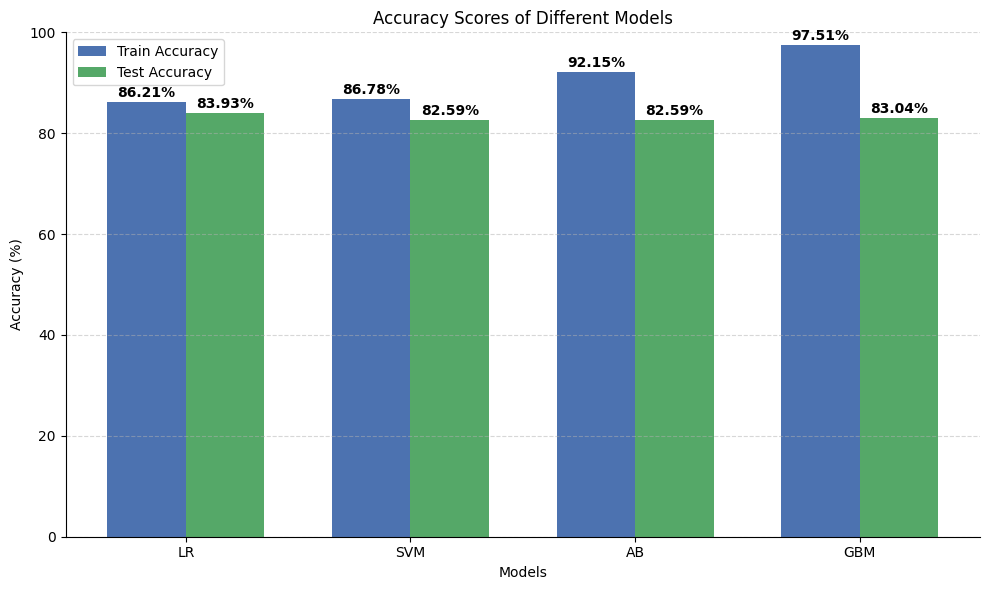

In [264]:
import matplotlib.pyplot as plt
import numpy as np

# Define the accuracy scores from the previous code snippet
results = {
    'LR': 86.207,
    'SVM': 86.782,
    'AB': 92.146,
    'GBM': 97.510
}

results2 = {
    'LR': 83.929,
    'SVM': 82.589,
    'AB': 82.589,
    'GBM': 83.036
}


# Prepare the data for plotting
models = ['LR', 'SVM', 'AB', 'GBM']
train_scores = [accuracy0 for accuracy0 in results.values()]
test_scores = [acc for acc in results2.values()]

# Set color palette
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2']

# Create the bar plot
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Train Accuracy', color=colors[0])
plt.bar(x + width/2, test_scores, width, label='Test Accuracy', color=colors[1])

# Add data labels
for i, v in enumerate(train_scores):
    plt.text(i - width/2, v + 1, f'{v:.2f}%', ha='center', color='black', fontweight='bold')
for i, v in enumerate(test_scores):
    plt.text(i + width/2, v + 1, f'{v:.2f}%', ha='center', color='black', fontweight='bold')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Scores of Different Models')
plt.xticks(x, models)
plt.ylim(0, 100)
plt.legend()

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


## use Feature Selection

In [239]:
from sklearn.feature_selection import chi2,SelectKBest

In [240]:
selector = SelectKBest(chi2, k=10)
df_new = selector.fit_transform(df_normalized.drop(['HeartDisease'], axis=1), df_normalized['HeartDisease'])

In [241]:
# show the selected features
features = df_normalized.drop(['HeartDisease'], axis=1).columns[selector.get_support()]
features.values

array(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype=object)

In [242]:
df_featuresSelected = pd.DataFrame(df_new, columns=features)

In [243]:
df_featuresSelected.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.571429,1.0,0.000000,0.259259,0.000000,0.0,0.533835,0.0,0.015873,1.0
1,0.489796,1.0,0.333333,0.444444,0.028958,0.0,0.518797,1.0,0.015873,1.0
2,0.571429,1.0,0.000000,0.259259,0.028958,0.0,0.383459,1.0,0.253968,0.5
3,0.836735,1.0,0.000000,0.444444,0.048263,1.0,0.300752,1.0,0.253968,0.5
4,0.979592,1.0,0.666667,0.111111,0.054054,0.0,0.383459,0.0,0.571429,0.0


In [244]:
X_train, X_test, y_train, y_test = train_test_split(df_featuresSelected, df_normalized['HeartDisease'], test_size=0.3, random_state=42)

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))  # 4
models.append(('SVM', SVC(kernel='linear'))) # 3
models.append(('AB', AdaBoostClassifier())) # 2
models.append(('GBM', GradientBoostingClassifier())) # 1


# evaluate each model in turn
results = {}
for name, model in models:
    model.fit(X_train, y_train)
    accuracy0 = model.score(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print("train %s: %.3f%%" % (name, accuracy0 * 100))
    print("test %s: %.3f%%" % (name, acc * 100))


train LR: 86.207%
test LR: 84.375%
train SVM: 86.973%
test SVM: 82.589%
train AB: 91.379%
test AB: 83.036%
train GBM: 97.126%
test GBM: 82.589%


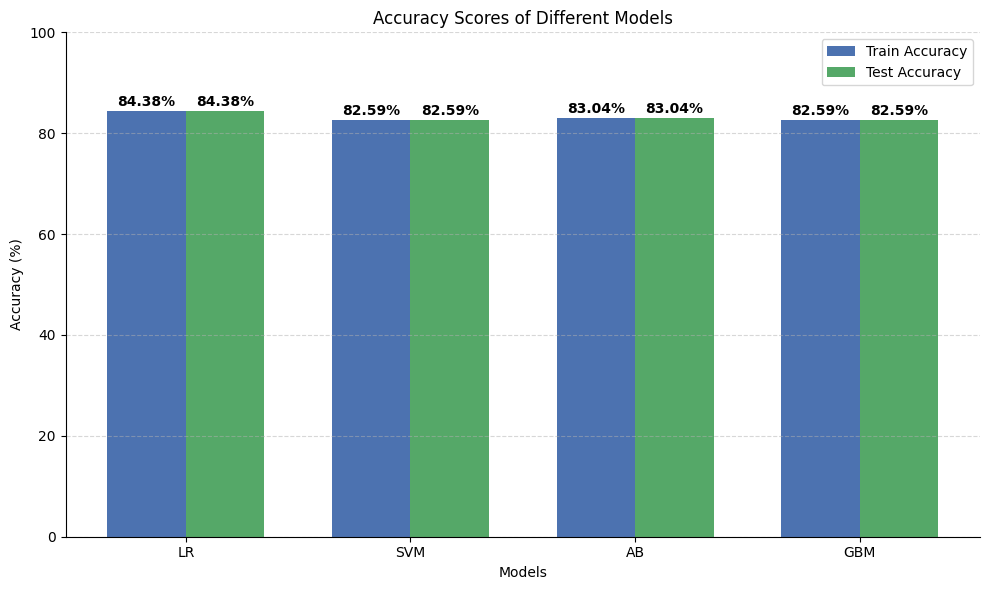

In [246]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for plotting
models = ['LR', 'SVM', 'AB', 'GBM']
train_scores = [accuracy0 * 100 for accuracy0 in results.values()]
test_scores = [acc * 100 for acc in results.values()]

# Set color palette
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2']

# Create the bar plot
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Train Accuracy', color=colors[0])
plt.bar(x + width/2, test_scores, width, label='Test Accuracy', color=colors[1])

# Add data labels
for i, v in enumerate(train_scores):
    plt.text(i - width/2, v + 1, f'{v:.2f}%', ha='center', color='black', fontweight='bold')
for i, v in enumerate(test_scores):
    plt.text(i + width/2, v + 1, f'{v:.2f}%', ha='center', color='black', fontweight='bold')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Scores of Different Models')
plt.xticks(x, models)
plt.ylim(0, 100)
plt.legend()

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


## Outlier

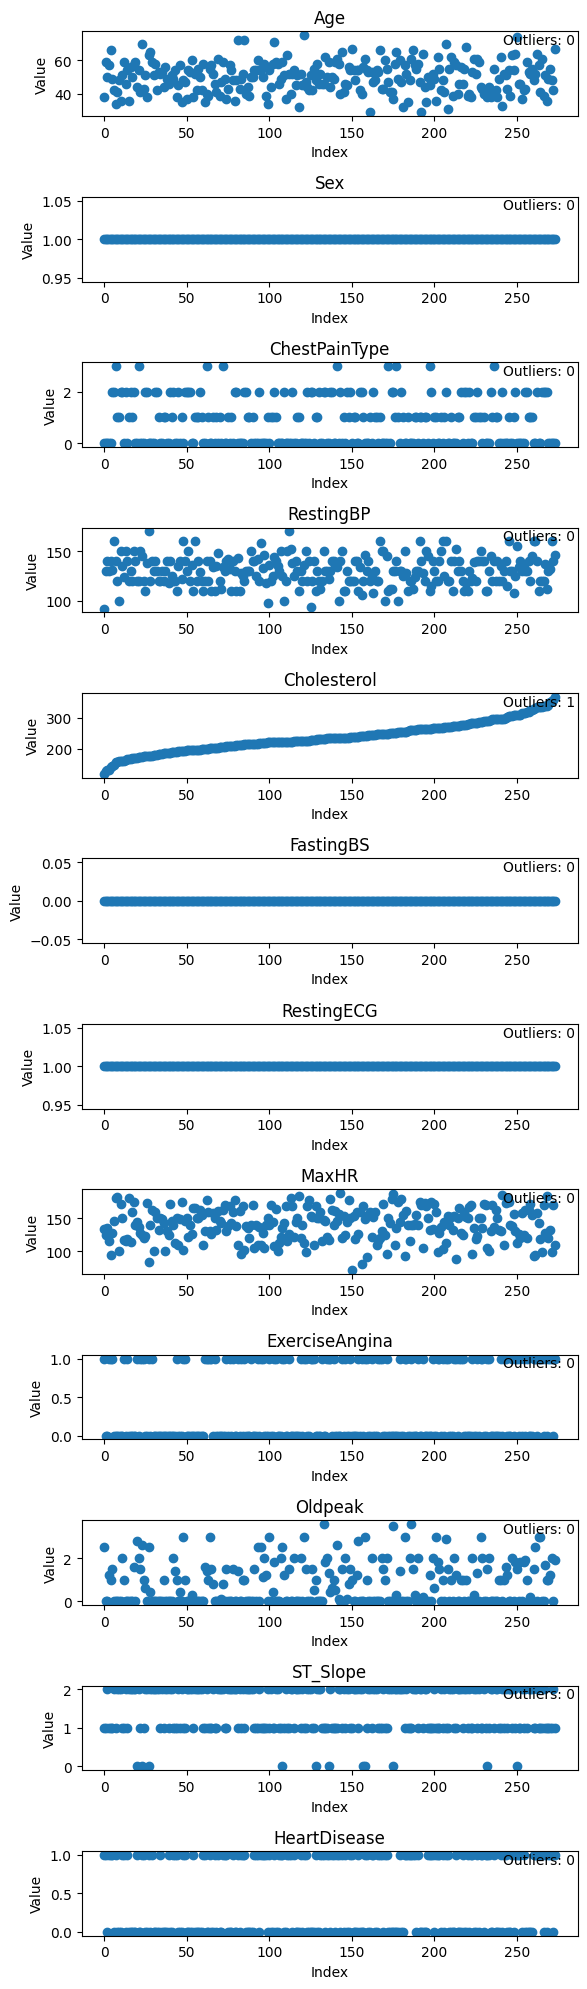

Number of Outliers Before Removing: Age                 0
Sex               182
ChestPainType       0
RestingBP          20
Cholesterol        23
FastingBS         125
RestingECG        301
MaxHR               0
ExerciseAngina      0
Oldpeak            15
ST_Slope            0
HeartDisease        0
dtype: int64
Number of Outliers After Removing: Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       1
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
(274, 12)


In [247]:
import matplotlib.pyplot as plt

# Define columns of interest
columns = df.columns.tolist()

# Calculate the IQR for each column
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
outlier_threshold = 1.5

# Identify outliers in each column
outliers = (df[columns] < (Q1 - outlier_threshold * IQR)) | (df[columns] > (Q3 + outlier_threshold * IQR))

# Count the number of outliers in each column before removing
num_outliers_before = outliers.sum()

# Filter the DataFrame to remove outliers
df_filtered = df[~outliers.any(axis=1)]

# Calculate the IQR for each column after removing outliers
Q1_filtered = df_filtered[columns].quantile(0.25)
Q3_filtered = df_filtered[columns].quantile(0.75)
IQR_filtered = Q3_filtered - Q1_filtered

# Identify outliers in each column after removing
outliers_filtered = (df_filtered[columns] < (Q1_filtered - outlier_threshold * IQR_filtered)) | (df_filtered[columns] > (Q3_filtered + outlier_threshold * IQR_filtered))

# Count the number of outliers in each column after removing
num_outliers_after = outliers_filtered.sum()

# Create scatter plots for each column after removing outliers
fig, axs = plt.subplots(len(columns), 1, figsize=(6, 20))

# Iterate over each column and plot the scatter plot
for i, column in enumerate(columns):
    axs[i].scatter(range(df_filtered.shape[0]), df_filtered[column])
    axs[i].set_title(column)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Value')
    axs[i].text(0.85, 0.85, f'Outliers: {num_outliers_after[column]}', transform=axs[i].transAxes)

plt.tight_layout()
plt.show()

# Output the number of outliers before and after removing
print("Number of Outliers Before Removing:", num_outliers_before)
print("Number of Outliers After Removing:", num_outliers_after)

df = df_filtered
print(df.shape)


In [248]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

In [249]:
df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]

In [250]:
df.shape

(273, 12)

In [251]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
5,38,1,0,92,117,0,1,134,1,2.5,1,1
7,59,1,0,130,126,0,1,125,0,0.0,1,1
9,50,1,0,140,129,0,1,135,0,0.0,2,0
10,57,1,0,130,131,0,1,115,1,1.2,1,1
12,66,1,0,140,139,0,1,94,1,1.0,1,1


In [252]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_12072\33369368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = le.fit_transform(df['Sex'])
C:\Users\Hp\AppData\Local\Temp\ipykernel_12072\33369368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
C:\Users\Hp\AppData\Local\Temp\ipykernel_12072\33369368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [253]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['HeartDisease'], axis=1), df['HeartDisease'], test_size=0.3, random_state=42)

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))  # 4
models.append(('SVM', SVC(kernel='linear'))) # 3
models.append(('AB', AdaBoostClassifier())) # 2
models.append(('GBM', GradientBoostingClassifier())) # 1


# evaluate each model in turn
results = {}
for name, model in models:
    model.fit(X_train, y_train)
    accuracy0 = model.score(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print("train %s: %.3f%%" % (name, accuracy0 * 100))
    print("test %s: %.3f%%" % (name, acc * 100))


train LR: 85.864%
test LR: 86.585%


E:\Aconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train SVM: 87.435%
test SVM: 86.585%
train AB: 96.335%
test AB: 84.146%
train GBM: 100.000%
test GBM: 87.805%


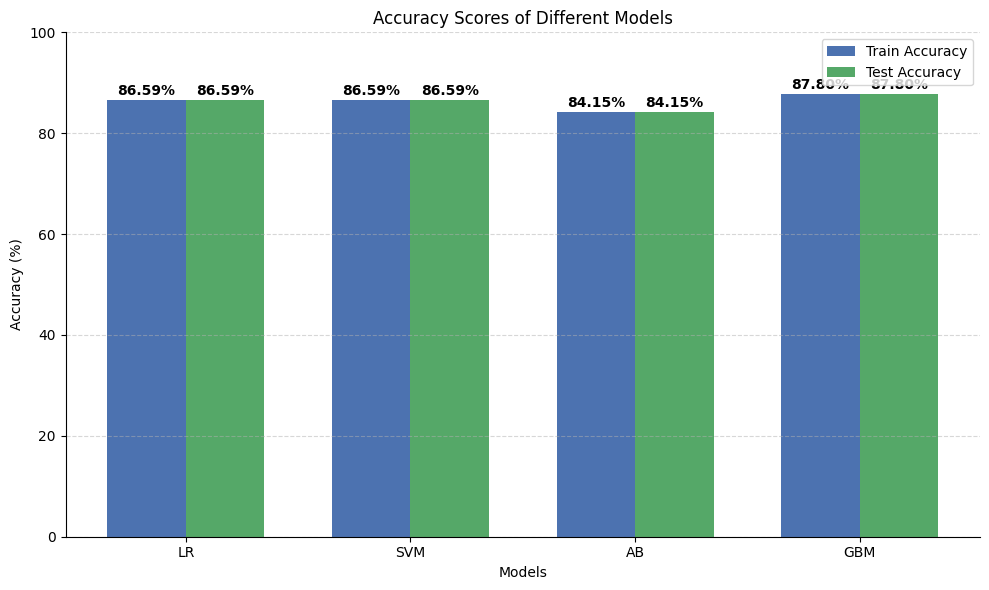

In [255]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for plotting
models = ['LR', 'SVM', 'AB', 'GBM']
train_scores = [accuracy0 * 100 for accuracy0 in results.values()]
test_scores = [acc * 100 for acc in results.values()]

# Set color palette
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2']

# Create the bar plot
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Train Accuracy', color=colors[0])
plt.bar(x + width/2, test_scores, width, label='Test Accuracy', color=colors[1])

# Add data labels
for i, v in enumerate(train_scores):
    plt.text(i - width/2, v + 1, f'{v:.2f}%', ha='center', color='black', fontweight='bold')
for i, v in enumerate(test_scores):
    plt.text(i + width/2, v + 1, f'{v:.2f}%', ha='center', color='black', fontweight='bold')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Scores of Different Models')
plt.xticks(x, models)
plt.ylim(0, 100)
plt.legend()

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


## use a NNS

In [256]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have your dataset loaded into X (input features) and y (target variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['HeartDisease'], axis=1), df['HeartDisease'], test_size=0.3, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an MLP classifier with three hidden layers, each containing 100 neurons
mlp = MLPClassifier(hidden_layer_sizes=(20,20, 20), max_iter=300)

# Train the MLP classifier on the training data
mlp.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = mlp.predict(X_test)

# Evaluate the accuracy of the classifier
print("Accuracy:", mlp.score(X_train, y_train))
accuracy = mlp.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9685863874345549
Accuracy: 0.8170731707317073


E:\Aconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


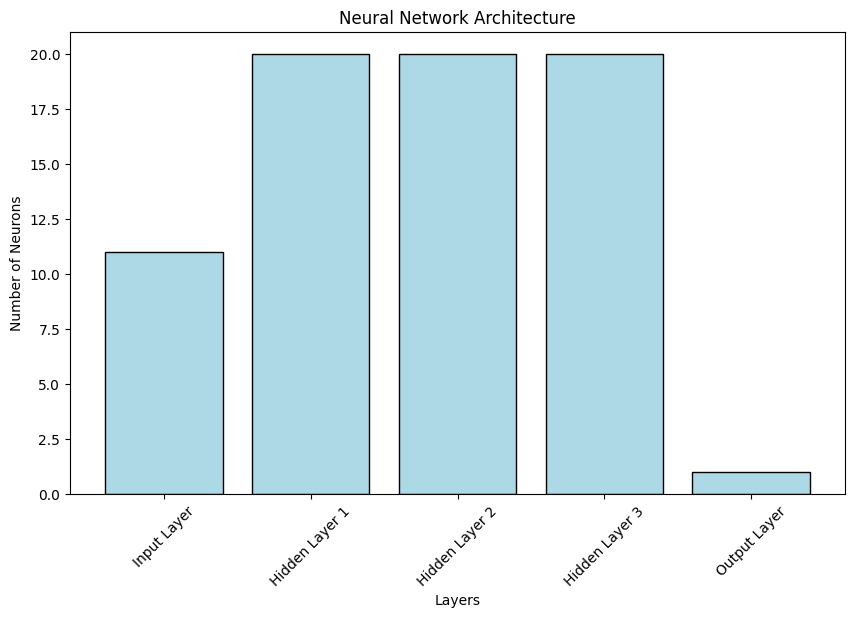

In [257]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Neural Network Architecture")
plt.xlabel("Layers")
plt.ylabel("Number of Neurons")
hidden_layers = mlp.hidden_layer_sizes
neuron_counts = [X_train.shape[1]] + list(hidden_layers) + [1]
layer_labels = ['Input Layer'] + [f'Hidden Layer {i}' for i in range(1, len(hidden_layers) + 1)] + ['Output Layer']
plt.bar(layer_labels, neuron_counts, color='lightblue', edgecolor='black')
plt.xticks(rotation=45)
plt.show()
